In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import tree

In [4]:
from sklearn import preprocessing

In [5]:
titanic_train = pd.read_csv("train.csv")

In [6]:
titanic_train["Age"].mean()

29.69911764705882

In [7]:
new_age_var = np.where(titanic_train["Age"].isnull(),29,titanic_train["Age"])

In [9]:
titanic_train["Age"] = new_age_var

In [11]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

In [13]:
tree_model = tree.DecisionTreeClassifier()

__Model__

__DV - Survived and IDV - Age, Gender and Fair__

In [14]:
predictors = pd.DataFrame([encoded_sex,titanic_train["Age"],titanic_train["Fare"]]).T

In [15]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

In [16]:
tree_model.fit(X=predictors, y = titanic_train["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
with open("Dtree4.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names = ["Sex","Age","Fare"],out_file = f)

__Dtree__
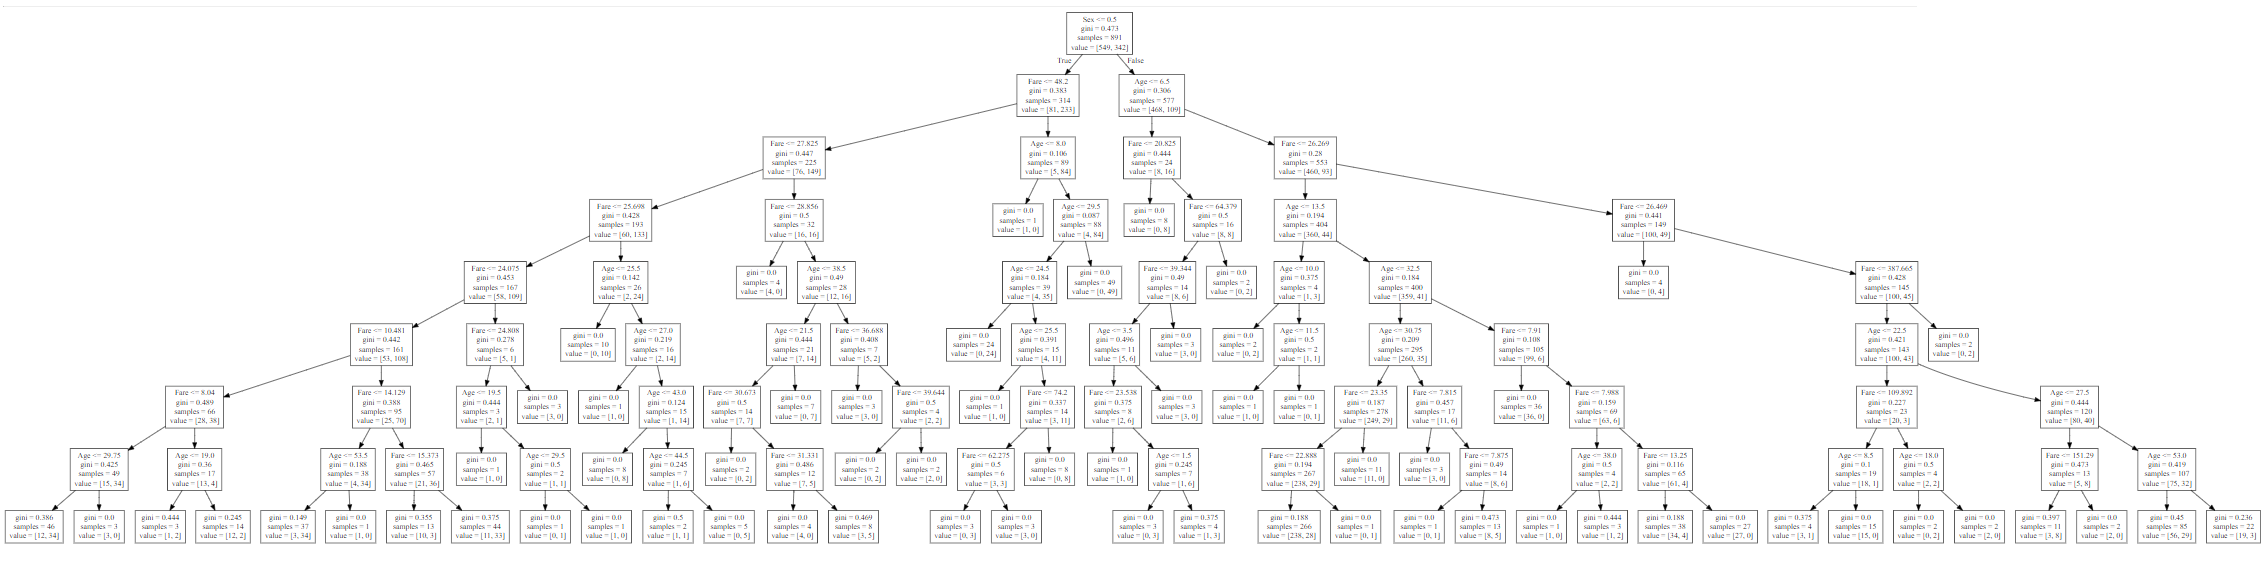

In [19]:
tree_model.score(X = predictors,y = titanic_train["Survived"])

0.8754208754208754

__Prediction__

In [20]:
titanic_test = pd.read_csv("test.csv")

In [21]:
titanic_train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.560236
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [22]:
new_age_var = np.where(titanic_test["Age"].isnull(),29,titanic_test["Age"])
new_fare_var = np.where(titanic_test["Fare"].isnull(),32,titanic_test["Fare"])
#Replacing all the null values with average value of age.

In [23]:
titanic_test["Age"] = new_age_var
titanic_test["Fare"] = new_fare_var

In [24]:
encoded_sex_test = label_encoder.fit_transform(titanic_test["Sex"])

In [26]:
test_features=pd.DataFrame([encoded_sex_test,titanic_test["Age"],titanic_test["Fare"]]).T

In [27]:
test_preds = tree_model.predict(X=test_features)

In [28]:
predicted_Output = pd.DataFrame({"Passengerid":titanic_test["PassengerId"],"Survived":test_preds})

In [29]:
predicted_Output.to_csv("Output.csv",index=False)